In [1]:
import numpy as np
import pandas as pd

# Given values from the provided code
theta = 120  # 换能器的开角
alpha = 1.5  # 坡度
D_center = 70  # 海域中心点处的海水深度
distances = [-800, -600, -400, -200, 0, 200, 400, 600, 800]

# Corrected calculation of depths for each distance
depths_corrected = [D_center - d * np.tan(np.radians(alpha)) for d in distances]

# Recalculate cover width using corrected depths
W_corrected = [2 * (D / np.cos(np.radians(alpha))) * np.tan(np.radians(theta / 2)) for D in depths_corrected]

# Recalculate overlap rate using corrected depths
eta_corrected = [None]  # The first position has no previous line, so overlap rate is None
for i in range(1, len(distances)):
    d = distances[i] - distances[i - 1]
    eta_corrected.append(100 * (1 - (d * np.cos(np.radians(alpha))) / (2 * depths_corrected[i] * np.tan(np.radians(theta / 2)))))

# Load the provided result1.xlsx to understand the format
original_format_df = pd.read_excel("E:/数学建模/2023数模/B题/result1.xlsx") #修改自己路径下的附件1

# Update the values in the original format DataFrame
original_format_df.iloc[0, 1:] = depths_corrected
original_format_df.iloc[1, 1:] = W_corrected
original_format_df.iloc[2, 1:] = eta_corrected

# Save the updated results back to result1_updated_format.xlsx
original_format_df.to_excel("result1_updated_format.xlsx", index=False)  #修改自己路径下的附件1

original_format_df  #更新后的

,测线距中心点处的距离/m,-800,-600,-400,-200,0,200,400,600,800
0,海水深度/m,90.948737,85.711553,80.474369,75.237184,70.000000,64.762816,59.525631,54.288447,49.051263
1,覆盖宽度/m,315.163666,297.015309,278.866951,260.718593,242.570236,224.421878,206.273521,188.125163,169.976805
2,与前一条测线的重叠率/%,None,32.663403,28.281211,23.288939,17.549653,10.882129,3.041360,-6.312200,-17.663113


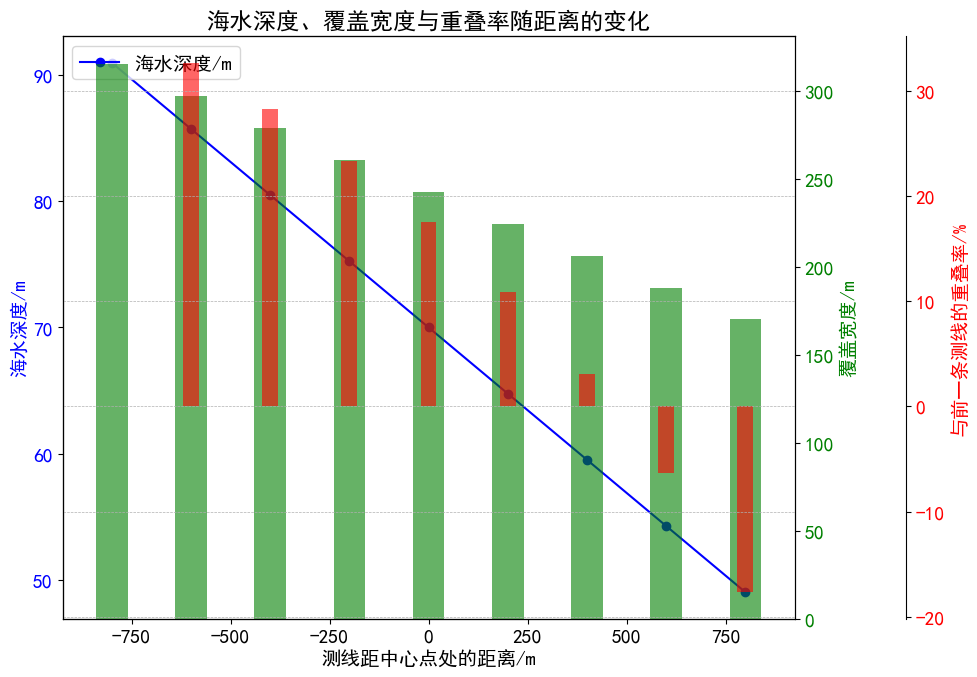

In [18]:
import matplotlib.pyplot as plt
# Replace None in eta_corrected with np.nan for plotting
eta_corrected_nan = [np.nan if e is None else e for e in eta_corrected]

# Redraw the visualization
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.rcParams['font.size'] = 14
# Plot the depths
ax1.plot(distances, depths_corrected, color='b', marker='o', label='海水深度/m')
ax1.set_xlabel('测线距中心点处的距离/m')
ax1.set_ylabel('海水深度/m', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis to plot the cover width and overlap rate
ax2 = ax1.twinx()
ax2.bar(distances, W_corrected, width=80, alpha=0.6, label='覆盖宽度/m', color='g')
ax2.set_ylabel('覆盖宽度/m', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Create a third y-axis to plot the overlap rate
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 80))
ax3.bar(distances, eta_corrected_nan, width=40, alpha=0.6, label='与前一条测线的重叠率/%', color='r')
ax3.set_ylabel('与前一条测线的重叠率/%', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Set the title and show the plot
plt.title('海水深度、覆盖宽度与重叠率随距离的变化')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



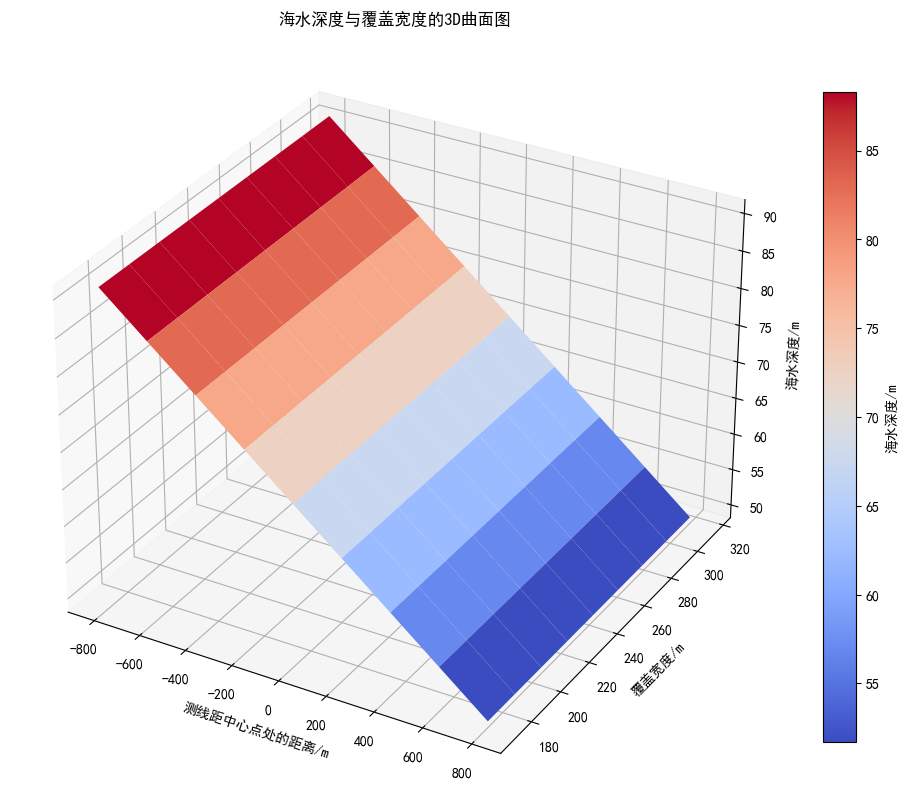

In [4]:
# Create the 3D surface plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the surface plot
X = np.array(distances)
Y = np.array(W_corrected)
X, Y = np.meshgrid(X, Y)

# Duplicate the depths array for the Z values in the meshgrid
Z = np.array([depths_corrected] * len(W_corrected))

# Create the surface plot
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)

# Set labels and title
ax.set_xlabel('测线距中心点处的距离/m')
ax.set_ylabel('覆盖宽度/m')
ax.set_zlabel('海水深度/m')
ax.set_title('海水深度与覆盖宽度的3D曲面图')

# Add a colorbar to indicate depths
cbar = fig.colorbar(surf, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('海水深度/m')

plt.show()



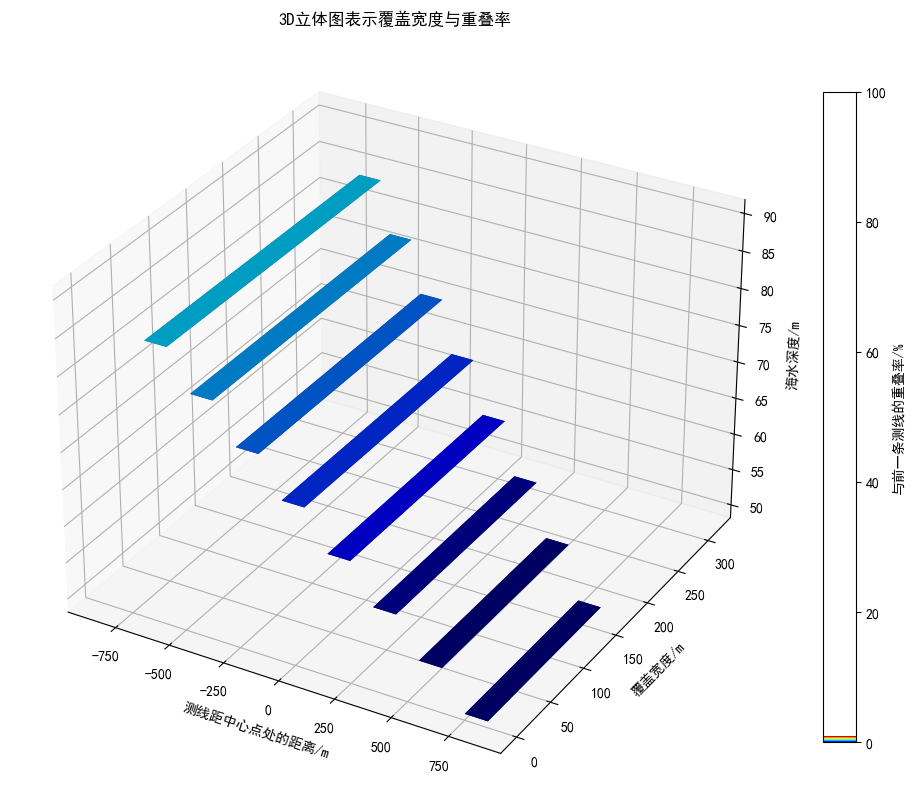

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化数据
theta = 120  # 换能器的开角
alpha = 1.5  # 坡度
D_center = 70  # 海域中心点处的海水深度
distances = [-800, -600, -400, -200, 0, 200, 400, 600, 800]
depths_corrected = [D_center - d * np.tan(np.radians(alpha)) for d in distances]
W_corrected = [2 * (D / np.cos(np.radians(alpha))) * np.tan(np.radians(theta / 2)) for D in depths_corrected]
eta_corrected = [None]  # The first position has no previous line, so overlap rate is None
for i in range(1, len(distances)):
    d = distances[i] - distances[i - 1]
    eta_corrected.append(100 * (1 - (d * np.cos(np.radians(alpha))) / (2 * depths_corrected[i] * np.tan(np.radians(theta / 2)))))
eta_corrected_nan = [np.nan if e is None else e for e in eta_corrected]
colors = plt.cm.jet(np.interp(eta_corrected_nan, (0, 100), (0, 1)))

# 绘制3D立体柱状图
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
bar_width = 100
for d, depth, width, color in zip(distances, depths_corrected, W_corrected, colors):
    ax.bar3d(d - bar_width/2, 0, depth, bar_width, width, 0, shade=True, color=color)

# 设置标签、标题并调整视角
ax.set_xlabel('测线距中心点处的距离/m')
ax.set_zlabel('海水深度/m')
ax.set_ylabel('覆盖宽度/m')
ax.set_title('3D立体图表示覆盖宽度与重叠率')
ax.view_init(30, -60)

# 添加颜色条来表示重叠率
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.jet), ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('与前一条测线的重叠率/%')
cbar.set_ticks(np.linspace(0, 100, 6))

plt.show()
